In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [93]:
df = pd.read_csv('scrapping data/data.csv', index_col=0)
df.set_index('Fund Name', inplace=True) 

In [94]:
df.head()

,Fund Size,Largecap Holding,Midcap Holding,Smallcap Holding,Tinycap Holding,Stocks Held,Stocks Sector,Percent Held
Fund Name,,,,,,,,
Quant Focused Fund,77 Crs,82.29 %,16.63 %,1.08%,0%,"['Adani Enterprises Ltd.', 'Vedanta Ltd.', 'Ad...","['Services', 'Metals & Mining', 'Services', 'C...","['8.72%', '7.99%', '7.73%', '7.72%', '6.3%', '..."
Quant Tax Plan,"1,166 Crs",55.57 %,34.45 %,9.98%,0%,"['Vedanta Ltd.', 'Adani Enterprises Ltd.', 'Ru...","['Metals & Mining', 'Services', 'Consumer Stap...","['6.53%', '5.8%', '5.75%', '5.7%', '5.57%', '5..."
Axis Growth Opportunities Fund,"7,250 Crs",55.43 %,41.6 %,2.97%,0%,"['Bajaj Finance Ltd.', 'PI Industries Ltd.', '...","['Financial', 'Chemicals', 'Technology', 'Fina...","['8.77%', '5.25%', '4.4%', '4%', '3.71%', '3.7..."
Canara Robeco Small Cap Fund,"2,344 Crs",4.61 %,46.94 %,48.45%,0%,"['KPR Mills Ltd.', 'Schaeffler India Ltd.', 'C...","['Textiles', 'Capital Goods', 'Financial', 'Ma...","['2.81%', '2.8%', '2.79%', '2.73%', '2.66%', '..."
PGIM India Midcap Opportunities Fund,"4,887 Crs",11.49 %,75.11 %,13.4%,0%,"['Persistent Systems Ltd.', 'Cummins India Ltd...","['Technology', 'Capital Goods', 'Capital Goods...","['4.74%', '3.72%', '3.44%', '3.39%', '3.38%', ..."


In [95]:
df.dtypes

Fund Size           object
Largecap Holding    object
Midcap Holding      object
Smallcap Holding    object
Tinycap Holding     object
Stocks Held         object
Stocks Sector       object
Percent Held        object
dtype: object

## Cleaning Data

In [96]:
#Converting "Fund Size" to numeric
def clean_fund_size(value):
    value = value.replace(' Crs', '')
    value = value.replace(',', '')
    return float(value)

df['Fund Size'] = df['Fund Size'].apply(clean_fund_size)

#Converting holding columns to numeric
df['Largecap Holding'] = df['Largecap Holding'].apply(lambda x: float(x.replace('%', '')))
df['Midcap Holding'] = df['Midcap Holding'].apply(lambda x: float(x.replace('%', '')))
df['Smallcap Holding'] = df['Smallcap Holding'].apply(lambda x: float(x.replace('%', '')))
df['Tinycap Holding'] = df['Tinycap Holding'].apply(lambda x: float(x.replace('%', '')))

df.rename(columns={'Fund Size': 'Fund Size (in Crs)',
                   'Largecap Holding': 'Largecap Holding (in %)',
                   'Midcap Holding':'Midcap Holding (in %)',
                   'Smallcap Holding':'Smallcap Holding (in %)',
                   'Tinycap Holding': 'Tinycap Holding (in %)'
                  }, inplace=True)


#Converting string values to lis
def clean_percent_hold_list(ls):
    ls = [float(i.replace('%', '')) for i in ls]
    return ls

df['Percent Held'] = df['Percent Held'].apply(eval)
df['Percent Held'] = df['Percent Held'].apply(clean_percent_hold_list)

df['Stocks Held'] = df['Stocks Held'].apply(eval)
df['Stocks Sector'] = df['Stocks Sector'].apply(eval)

df.head()

,Fund Size (in Crs),Largecap Holding (in %),Midcap Holding (in %),Smallcap Holding (in %),Tinycap Holding (in %),Stocks Held,Stocks Sector,Percent Held
Fund Name,,,,,,,,
Quant Focused Fund,77.0,82.29,16.63,1.08,0.0,"[Adani Enterprises Ltd., Vedanta Ltd., Adani P...","[Services, Metals & Mining, Services, Consumer...","[8.72, 7.99, 7.73, 7.72, 6.3, 6.02, 5.82, 5.75..."
Quant Tax Plan,1166.0,55.57,34.45,9.98,0.0,"[Vedanta Ltd., Adani Enterprises Ltd., Ruchi S...","[Metals & Mining, Services, Consumer Staples, ...","[6.53, 5.8, 5.75, 5.7, 5.57, 5.26, 5.18, 5.11,..."
Axis Growth Opportunities Fund,7250.0,55.43,41.60,2.97,0.0,"[Bajaj Finance Ltd., PI Industries Ltd., Tata ...","[Financial, Chemicals, Technology, Financial, ...","[8.77, 5.25, 4.4, 4.0, 3.71, 3.71, 3.65, 3.64,..."
Canara Robeco Small Cap Fund,2344.0,4.61,46.94,48.45,0.0,"[KPR Mills Ltd., Schaeffler India Ltd., Can Fi...","[Textiles, Capital Goods, Financial, Materials...","[2.81, 2.8, 2.79, 2.73, 2.66, 2.62, 2.48, 2.4,..."
PGIM India Midcap Opportunities Fund,4887.0,11.49,75.11,13.40,0.0,"[Persistent Systems Ltd., Cummins India Ltd., ...","[Technology, Capital Goods, Capital Goods, Fin...","[4.74, 3.72, 3.44, 3.39, 3.38, 3.37, 3.2, 3.06..."


In [99]:
df.describe()

,Fund Size (in Crs),Largecap Holding (in %),Midcap Holding (in %),Smallcap Holding (in %),Tinycap Holding (in %)
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,4555.555556,54.957037,32.418148,12.590370,0.035185
std,5554.958646,28.470650,20.356817,13.677474,0.113591
min,77.000000,2.130000,1.910000,0.000000,0.000000
25%,778.000000,37.960000,17.985000,2.505000,0.000000
50%,2344.000000,58.270000,26.990000,7.260000,0.000000
75%,5767.000000,78.175000,43.475000,16.735000,0.000000
max,21932.000000,98.090000,80.620000,48.450000,0.520000


<AxesSubplot:ylabel='Fund Size (in Crs)'>

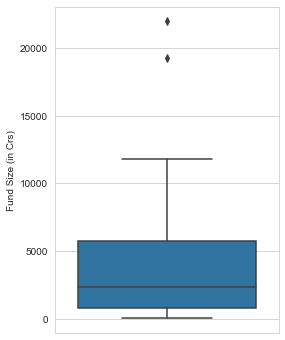

In [113]:
plt.figure(figsize=(4, 6))
sns.set_style("whitegrid")
sns.boxplot(y =df['Fund Size (in Crs)'])

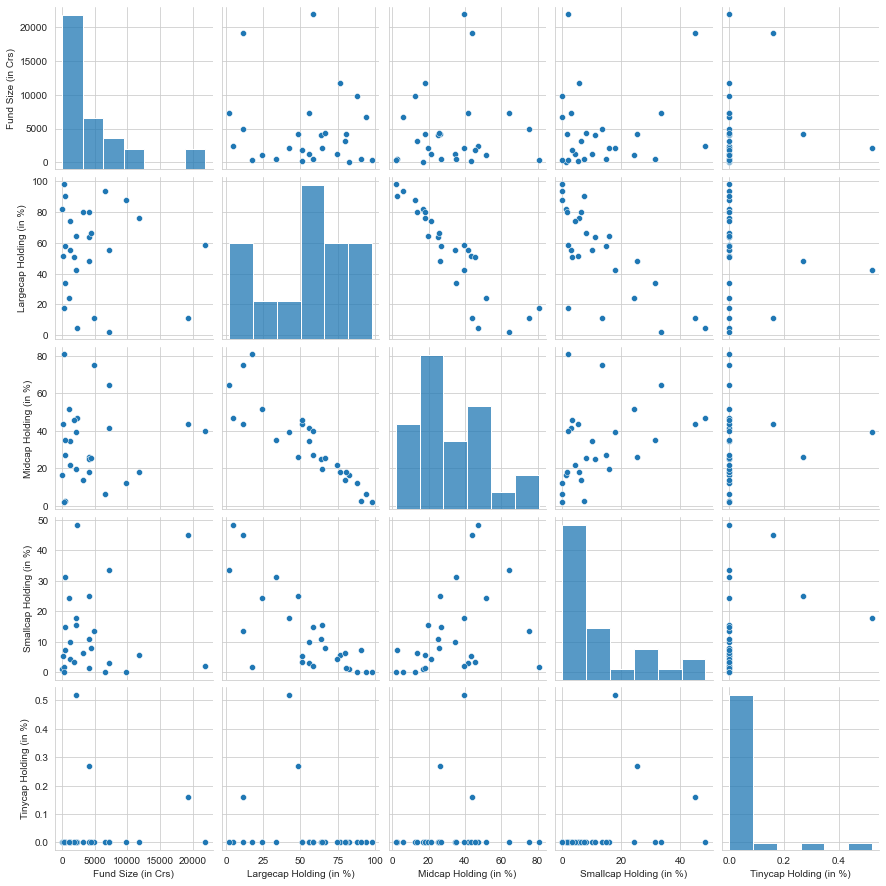

In [117]:
sns.pairplot(df)

<AxesSubplot:>

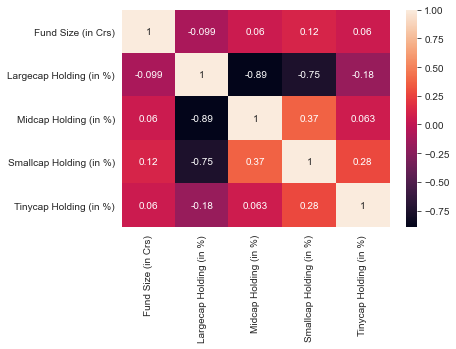

In [326]:
sns.heatmap(df.corr(), annot=True)

### Large cap holding tend to have negative correlation with mid cap holdings and small cap holdings.
### That means mutual funds generally tend to be either large cap focused or mid cap and small cap focused

<AxesSubplot:>

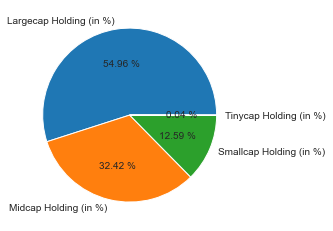

In [121]:
df[['Largecap Holding (in %)', 'Midcap Holding (in %)', 
    'Smallcap Holding (in %)', 'Tinycap Holding (in %)']
  ].mean().plot(kind='pie', autopct='%0.2f %%', ylabel='')

<AxesSubplot:xlabel='Fund Name', ylabel='Fund Size in Crs.'>

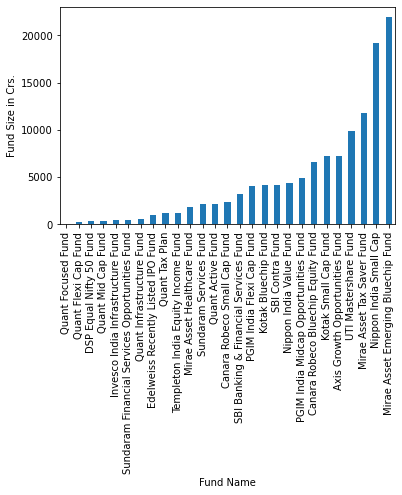

In [97]:
df.sort_values('Fund Size (in Crs)')['Fund Size (in Crs)'].plot(kind='bar', ylabel='Fund Size in Crs.')

In [168]:
stocks_held = pd.Series([s for _ls in df['Stocks Held'] for s in _ls])
stocks_held_vc = stocks_held.value_counts()
stocks_held_vc

ICICI Bank Ltd.                         19
State Bank of India                     17
Larsen & Toubro Ltd.                    15
HDFC Bank Ltd.                          15
Axis Bank Ltd.                          13
                                        ..
Quess Corp Ltd.                          1
JK Lakshmi Cement Ltd.                   1
Oriental Hotels Ltd.                     1
BSE Ltd.                                 1
Cognizant Technology Solutions Corp.     1
Length: 516, dtype: int64

In [169]:
len(stocks_held_vc)

516

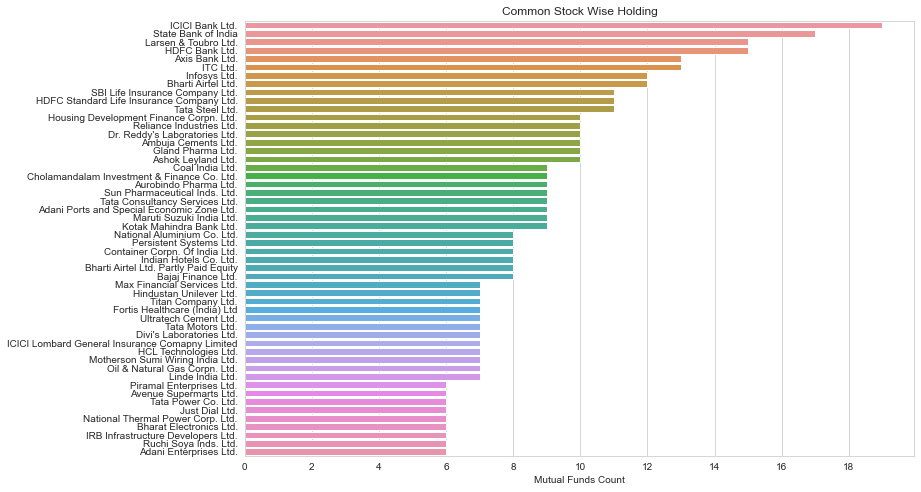

In [193]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=stocks_held_vc[stocks_held_vc > 5].index, x=stocks_held_vc[stocks_held_vc > 5])
ax.set_xlabel('Mutual Funds Count')
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.set_title('Common Stock Wise Holding');

In [171]:
sectors = pd.Series([s for _ls in df['Stocks Sector'] for s in _ls])
sectors_vs = sectors.value_counts()
sectors_vs

Financial                 215
Services                  156
Healthcare                142
Capital Goods             104
Automobile                 93
Materials                  92
Technology                 86
Consumer Staples           80
Construction               79
Chemicals                  76
Energy                     65
Metals & Mining            56
Consumer Discretionary     37
Communication              35
Textiles                   31
Insurance                  31
Others                      4
Diversified                 4
dtype: int64

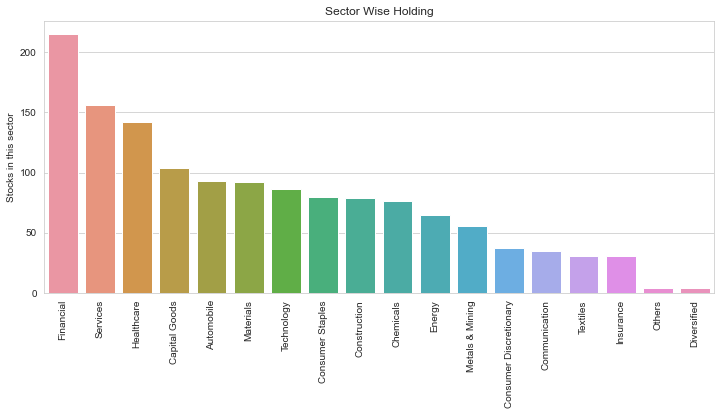

In [183]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=sectors_vs.index, y=sectors_vs)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_ylabel('Stocks in this sector')
ax.set_title('Sector Wise Holding');

In [259]:
percentage_invested = []
money_invested = []
for i in range(len(df)):
    amount = df.iloc[i]['Fund Size (in Crs)']
    _p = df.iloc[i]['Percent Held']
    for v in _p:
        percentage_invested.append(v)
        money_invested.append(v*amount/100)
percentage_invested = pd.Series(percentage_invested)
money_invested = pd.Series(money_invested)

In [260]:
stock_df = pd.DataFrame({'Stock Name': stocks_held, 'Sector': sectors, 
                         'Percentage Invested': percentage_invested, 'Money Invested': money_invested})

In [261]:
stock_df

,Stock Name,Sector,Percentage Invested,Money Invested
0,Adani Enterprises Ltd.,Services,8.72,6.7144
1,Vedanta Ltd.,Metals & Mining,7.99,6.1523
2,Adani Ports and Special Economic Zone Ltd.,Services,7.73,5.9521
3,ITC Ltd.,Consumer Staples,7.72,5.9444
4,ICICI Bank Ltd.,Financial,6.30,4.8510
...,...,...,...,...
1381,Vijaya Diagnostic Centre Ltd.,Healthcare,0.85,8.7975
1382,RailTel Corporation India Ltd.,Communication,0.76,7.8660
1383,Route Mobile Ltd.,Technology,0.67,6.9345
1384,HDFC Asset Management Company Ltd.,Financial,0.52,5.3820


In [262]:
_s = stocks_held_vc.to_frame(name='Count')
_s.index.name = 'Stock Name'
stock_df = pd.merge(stock_df, _s, on='Stock Name')

In [263]:
stock_df = stock_df.groupby(['Stock Name', 'Sector'], as_index=False).sum()
stock_df.set_index('Stock Name', inplace=True)

In [264]:
stock_df.sort_values('Count', ascending=False, inplace=True)
stock_df

,Sector,Percentage Invested,Money Invested,Count
Stock Name,,,,
ICICI Bank Ltd.,Financial,115.94,5338.3819,361
State Bank of India,Financial,68.88,2736.6190,289
HDFC Bank Ltd.,Financial,103.28,5114.2082,225
Larsen & Toubro Ltd.,Construction,54.37,1927.0506,225
Axis Bank Ltd.,Financial,48.70,2924.2622,169
...,...,...,...,...
JP Morgan Chase & Co. (US),Financial,0.72,52.2000,1
JM Financial Ltd.,Financial,0.42,18.4548,1
JK Lakshmi Cement Ltd.,Materials,0.10,19.2140,1


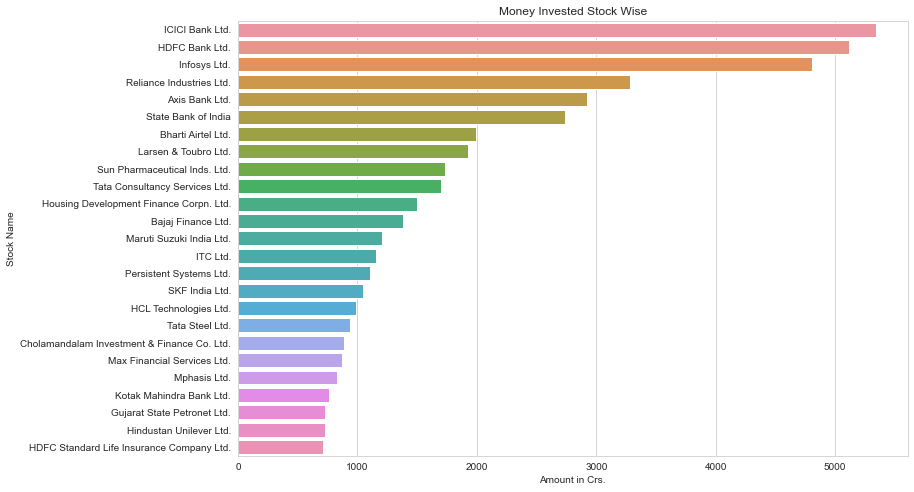

In [277]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=stock_df.sort_values('Money Invested', ascending=False).head(25).index, 
                 x=stock_df.sort_values('Money Invested', ascending=False).head(25)['Money Invested'])
ax.set_xlabel('Amount in Crs.')
ax.set_title('Money Invested Stock Wise');

In [279]:
df.to_csv('mf_data.csv')

In [280]:
df[['Largecap Holding (in %)', 'Midcap Holding (in %)', 'Smallcap Holding (in %)', 'Tinycap Holding (in %)']].sum(axis=1) 

Fund Name
Quant Focused Fund                                100.00
Quant Tax Plan                                    100.00
Axis Growth Opportunities Fund                    100.00
Canara Robeco Small Cap Fund                      100.00
PGIM India Midcap Opportunities Fund              100.00
SBI Contra Fund                                   100.01
Canara Robeco Bluechip Equity Fund                100.00
Quant Active Fund                                 100.00
Quant Mid Cap Fund                                100.00
Mirae Asset Emerging Bluechip Fund                100.00
PGIM India Flexi Cap Fund                         100.00
Kotak Bluechip Fund                               100.00
Mirae Asset Tax Saver Fund                        100.00
Nippon India Value Fund                           100.00
Kotak Small Cap Fund                              100.01
UTI Mastershare Fund                              100.00
Nippon India Small Cap                            100.00
Sundaram Services Fun

In [294]:
nif50_df = pd.read_csv('nifty50.csv', index_col=0)

In [295]:
nif50_df.head()

,Company Name,Sector,Weightage,Market Cap (in Crs)
Sr.No.,,,,
1,Reliance Industries Ltd.,Petroleum Products,11.92%,"17,73,469"
2,Infosys Ltd.,Software,9.15%,"6,49,302"
3,HDFC Bank Ltd.,Banks,8.45%,"7,31,068"
4,ICICI Bank Ltd.,Banks,6.65%,"5,00,153"
5,Housing Development Finance Corpn. Ltd.,Finance,5.67%,"3,90,046"


In [296]:
stock_df.head()

,Sector,Percentage Invested,Money Invested,Count,Nifty Weightage,Market Cap
Stock Name,,,,,,
ICICI Bank Ltd.,Financial,115.94,5338.3819,361,NaN,NaN
State Bank of India,Financial,68.88,2736.6190,289,NaN,NaN
HDFC Bank Ltd.,Financial,103.28,5114.2082,225,NaN,NaN
Larsen & Toubro Ltd.,Construction,54.37,1927.0506,225,NaN,NaN
Axis Bank Ltd.,Financial,48.70,2924.2622,169,NaN,NaN


In [318]:
weightage = []
market_cap = []
for stock in stock_df.index:
    if stock in nif50_df['Company Name'].tolist():
        weightage.append(nif50_df[nif50_df['Company Name'] == stock]['Weightage'].str[:-1].values[0])
        market_cap.append(nif50_df[nif50_df['Company Name'] == stock]['Market Cap (in Crs)'].values[0])
    else:
        weightage.append(np.nan)
        market_cap.append(np.nan)    
stock_df['Nifty Weightage'] = weightage
stock_df['Market Cap'] = market_cap

In [320]:
stock_df.head()

,Sector,Percentage Invested,Money Invested,Count,Nifty Weightage,Market Cap
Stock Name,,,,,,
ICICI Bank Ltd.,Financial,115.94,5338.3819,361,6.65,"5,00,153"
State Bank of India,Financial,68.88,2736.6190,289,2.48,"4,32,264"
HDFC Bank Ltd.,Financial,103.28,5114.2082,225,8.45,"7,31,068"
Larsen & Toubro Ltd.,Construction,54.37,1927.0506,225,2.80,"2,27,980"
Axis Bank Ltd.,Financial,48.70,2924.2622,169,2.63,"2,06,726"


In [323]:
stock_df.to_csv("stock_df.csv")

In [324]:
stock_df

,Sector,Percentage Invested,Money Invested,Count,Nifty Weightage,Market Cap
Stock Name,,,,,,
ICICI Bank Ltd.,Financial,115.94,5338.3819,361,6.65,"5,00,153"
State Bank of India,Financial,68.88,2736.6190,289,2.48,"4,32,264"
HDFC Bank Ltd.,Financial,103.28,5114.2082,225,8.45,"7,31,068"
Larsen & Toubro Ltd.,Construction,54.37,1927.0506,225,2.80,"2,27,980"
Axis Bank Ltd.,Financial,48.70,2924.2622,169,2.63,"2,06,726"
...,...,...,...,...,...,...
JP Morgan Chase & Co. (US),Financial,0.72,52.2000,1,NaN,NaN
JM Financial Ltd.,Financial,0.42,18.4548,1,NaN,NaN
JK Lakshmi Cement Ltd.,Materials,0.10,19.2140,1,NaN,NaN


,Fund Size (in Crs),Largecap Holding (in %),Midcap Holding (in %),Smallcap Holding (in %),Tinycap Holding (in %),Stocks Held,Stocks Sector,Percent Held
Fund Name,,,,,,,,
Quant Focused Fund,77.0,82.29,16.63,1.08,0.00,"[Adani Enterprises Ltd., Vedanta Ltd., Adani P...","[Services, Metals & Mining, Services, Consumer...","[8.72, 7.99, 7.73, 7.72, 6.3, 6.02, 5.82, 5.75..."
Quant Tax Plan,1166.0,55.57,34.45,9.98,0.00,"[Vedanta Ltd., Adani Enterprises Ltd., Ruchi S...","[Metals & Mining, Services, Consumer Staples, ...","[6.53, 5.8, 5.75, 5.7, 5.57, 5.26, 5.18, 5.11,..."
Axis Growth Opportunities Fund,7250.0,55.43,41.60,2.97,0.00,"[Bajaj Finance Ltd., PI Industries Ltd., Tata ...","[Financial, Chemicals, Technology, Financial, ...","[8.77, 5.25, 4.4, 4.0, 3.71, 3.71, 3.65, 3.64,..."
Canara Robeco Small Cap Fund,2344.0,4.61,46.94,48.45,0.00,"[KPR Mills Ltd., Schaeffler India Ltd., Can Fi...","[Textiles, Capital Goods, Financial, Materials...","[2.81, 2.8, 2.79, 2.73, 2.66, 2.62, 2.48, 2.4,..."
PGIM India Midcap Opportunities Fund,4887.0,11.49,75.11,13.40,0.00,"[Persistent Systems Ltd., Cummins India Ltd., ...","[Technology, Capital Goods, Capital Goods, Fin...","[4.74, 3.72, 3.44, 3.39, 3.38, 3.37, 3.2, 3.06..."
SBI Contra Fund,4209.0,48.44,26.15,25.15,0.27,"[Nifty 50, GAIL (India) Ltd., HCL Technologies...","[Others, Energy, Technology, Automobile, Finan...","[7.06, 3.16, 2.96, 2.93, 2.51, 2.43, 2.39, 2.2..."
Canara Robeco Bluechip Equity Fund,6647.0,93.88,6.12,0.00,0.00,"[Infosys Ltd., ICICI Bank Ltd., HDFC Bank Ltd....","[Technology, Financial, Financial, Energy, Tec...","[9.08, 8.33, 8.04, 8.04, 4.76, 4.15, 3.39, 3.1..."
Quant Active Fund,2107.0,42.15,39.47,17.86,0.52,"[Vedanta Ltd., ITC Ltd., State Bank of India, ...","[Metals & Mining, Consumer Staples, Financial,...","[8.29, 6.53, 5.65, 4.56, 4.39, 3.97, 3.92, 3.7..."
Quant Mid Cap Fund,361.0,17.53,80.62,1.85,0.00,"[Linde India Ltd., Indian Hotels Co. Ltd., Ruc...","[Chemicals, Services, Consumer Staples, Metals...","[9.69, 8.23, 7.36, 6.44, 6.08, 5.12, 4.5, 4.48..."
